# 혼공머 03-1
> k최근접이웃 회귀, 결정계수

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김동준
- categories : ["Python", "혼공머"]

# 주로쓰는 패키지들

In [48]:
import numpy as np #넘파이
import pandas as pd #판다스
from plotnine import *  #플롯나인
import matplotlib.pyplot as plt #맷플랏립
import plotly.express as px #플랏리 상호작용 그래프
from IPython.display import HTML #블로그에 html로 올리려고 변환하는 패키지
import seaborn as sns # 씨본, 히스토그램 깔끔하게 그리는 패키지
from sklearn.neighbors import KNeighborsClassifier # k 최근접이웃
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor  # 결정계수 
from sklearn.metrics import mean_absolute_error # 타깃과 예측의 절댓값 오차 평균을 반환

# k-최근접 이웃 회귀

## 회귀
> 정해진 클래스가 없고 임의의 수치를 출력

> 두 변수 사이의 상관관계를 분석하는 방법

# 데이터 준비
> https://bit.ly/perch_data

In [39]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

## 산점도 그리기

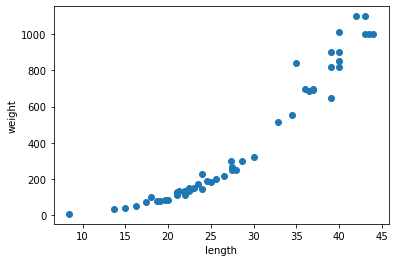

In [40]:
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 훈련세트 테스트세트 나누기

In [41]:
train_input , test_input , train_target , test_target = train_test_split(perch_length,perch_weight, random_state=42)

## 1차원 배열을 2차원 배열로 만들기

In [42]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [43]:
test_array = test_array.reshape(2, 2)   # 바꾸려는 배열의 크기를 지정가능
print(test_array.shape)

(2, 2)


In [44]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)    # reshape(-1,1) 은 배열의 전체 원소 개수를 매번 외우지 않아도 된다.
print(train_input.shape , test_input.shape)

(42, 1) (14, 1)


# 결정계수 $R^2$

In [45]:
knr = KNeighborsRegressor()
#k최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [47]:
# 테스트 세트의 점수 확인
print(knr.score(test_input,test_target))

0.992809406101064


> 결정계수

### 결정계수 $ R^2 = 1- \frac{\sum(타깃 - 예측)^2}{\sum(타깃 - 평균)^2}   $

> 예측이 타깃에 가까워질수록 1에 가까워진다.

In [50]:
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target , test_prediction)
print(mae)

19.157142857142862


> 결과 예측이 평균적으로 19g정도 다르다는 것을 알 수 있음

# 과대 적합 vs 과소 적합

In [51]:
print(knr.score(train_input,train_target))

0.9698823289099254


> 앞서 진행한 테스트 세트와 값이 다르고 더 작아졌다.

### 과대 적합 : 훈련세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁠 때

> 모델을 조금 덜 복잡하게 만들어 해결

### 과소 적합 : 훈련세트 보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우

> 모델을 조금 더 복잡하게 만들어 해결

#### k최근접이웃 알고리즘의 기본값 k를 5에서 3으로 낮추기

In [54]:
knr.n_neighbors = 3
knr.fit(train_input , train_target)
print(knr.score(train_input,train_target))

0.9804899950518966


> k 값을 줄였더니 훈련세트의 $R^2$ 가 높아졌다.

In [55]:
print(knr.score(test_input,test_target))

0.9746459963987609


> 테스트 세트의 점수가 훈련 세트보다 낮아졌다 .  $\to $ 과소적합 문제 해결( 너무 큰 차이도 없어서 과대적합이라고 볼 수 도 없다.)

______________

# **마무리**

`*` 키워드로 끝내는 핵심 포인트

`-` **회귀** : 임의의 수치를 예측하는 문제 (타깃값도 임의의 수치가 됨)

`-` **k-최근접 이웃 회귀** : k최근접 이웃 알고리즘으로 회귀 문제를 해결. 가장 가까운 이웃 샘플을 찾고 이 샘플들의 타깃값을 평균하여 예측으로 삼는다.

`-` **결정계수** : 대표적인 회귀 문제의 성능 측정 도구입니다. 1에 가까울수록 좋고, 0에 가깝다면 성능이 나쁜 모델

`-` **과대적합** : 모델의 훈련 세트 성능이 테스트 세트 성능보다 훨씬 높을 때 일어납니다. 모델이 훈련 세트에 너무 집착해서 데이터에 내재된 거시적인 패턴을 감지하지 못합니다

`-` **과소적합** : 과대적합에 반대

> 훈련 세트와 테스트 세트 성능이 모두 동일하게 낮거나 테스트 세트 성능이 오히려 더 높을 때 일어납니다. 이런 경우 더 복잡한 모델을 사용해 훈련 트에 맞는 모델을 만들어야 합니다.

`-` **핵심 패키지**

`-` scikit-learn

> `1` KNeighborsRegressor : k-최근접 이웃 회귀 모델을 만드는 사이킷런 클래스입니다. n_neighbors 매개변수로 이웃의 개수를 지정합니다. 기본값은 5입니다. 다른 매개변수는 KNeighborsClassifier 클래스와 거의 동일합니다.\
`2` mean absolute_error() : 회귀 모델의 평균 절댓값 오차를 계산합니다. 첫 번째 매개변수는 타깃, 두 번째 매개변수는 예측값을 전달합니다. 이와 비슷한 함수로는 평균 제곱 오차를 계산하는 mean_squared_error()가 있습니다.(이 함수는 타깃과 예측을 뺀 값을 제곱한 다음 전체 샘플에 대해 평균한 값을 반환합니다.)

